<a href="https://colab.research.google.com/github/DanielaPortilloMercado/Inteligencia-Artificial/blob/main/LABORATORIOS/Laboratorio3/LAB05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LABORATORIO 5

# APRENDIZAJE NO SUPERVISADO
INTEGRANTES:

 Daniela Portillo Mercado

 Jaime Nina Vargas

 Zila Chungara Valencia

 Link dataset: https://archive.ics.uci.edu/dataset/31/covertype

 PUNTO 3 Link dataset: https://archive.ics.uci.edu/dataset/81/pen%2Bbased%2Brecognition%2Bof%2Bhandwritten%2Bdigits?utm_source=chatgpt.com



# Aprendizaje no supervisado generando un Dataset Sintetico

En este cuadernillo implementamos el Aprendisaje no Supervisado creando un datos sinteticos

In [ ]:
import numpy as np  # Librería para cálculos numéricos y generación de números aleatorios
import matplotlib.pyplot as plt  # Librería de gráficos
import matplotlib as mpl  # Acceso a mapas de color
from sklearn.cluster import KMeans  # Algoritmo de clustering K-Means
from sklearn.datasets import make_blobs  # Generación de datasets sintéticos tipo 'blobs'
from sklearn.metrics import silhouette_score, silhouette_samples  # Métricas de evaluación de clustering
from matplotlib.ticker import FixedLocator, FixedFormatter  # Para formatear ejes en los diagramas de silueta


## 1. Generacion de Datos Sinteticos

Para usar el algoritmo de K-Means vamos a generar datos sinteticos para aprender a usar esta tecnica. Para ello generamos un dataset sintetico en 2D con centroides aleatorios de entre 1 a 20.

In [ ]:
# Generar número de centroides aleatorio entre 1 y 20
num_centros = np.random.randint(1, 21)  # np.random.randint(incluye 1, excluye 21)
# Crear posiciones dispersas en 2D (amplio rango para buena separación)
blob_centers = np.random.rand(num_centros, 2) * 8000  # 10000 amplía la distancia entre centros
# Definir desviación estándar uniforme para cada blob (desviación de dispersión)
blob_std = np.array([200.0] * num_centros)  # Matriz de std = 200 para cada centro
# Generar dataset sintético de 24,000 puntos con make_blobs
total_samples = 24000  # Número total de muestras a generar
X, y = make_blobs(
    n_samples=total_samples,      # Total de puntos
    centers=blob_centers,          # Centros de los blobs
    cluster_std=blob_std,          # Desviación estándar de cada blob
    random_state=42                # Semilla para reproducibilidad
)

# Mostrar información básica del dataset
print(f"Shape del dataset: {X.shape} (debería ser (24000, 2))")  # Dimensiones del array X
print(f"Número de clusters generados (etiquetas únicas): {np.unique(y)}")  # IDs de blobs

Shape del dataset: (24000, 2) (debería ser (24000, 2))
Número de clusters generados (etiquetas únicas): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


### 1.1 Visualizacion Inicial (SCATTER PLOT)
Graficamos los puntos en 2D para verificar separación.

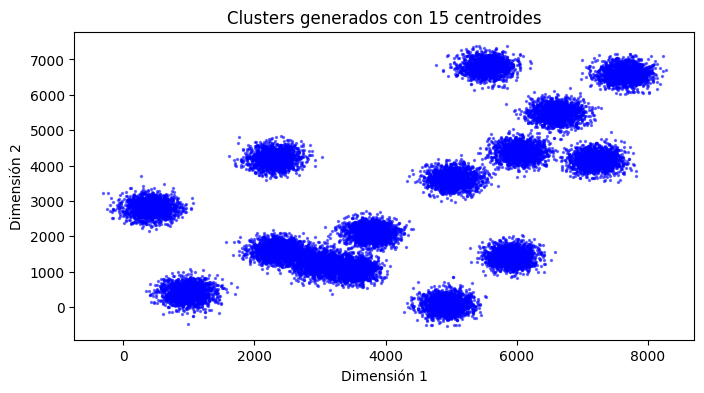

In [ ]:
def plot_clusters(X):
    # Dibujar todos los puntos como puntos azules semitransparentes
    plt.scatter(X[:, 0], X[:, 1], c='blue', s=2, alpha=0.5)
    plt.title(f"Clusters generados con {num_centros} centroides")  # Título con número de centros
    plt.xlabel("Dimensión 1")  # Etiqueta eje X
    plt.ylabel("Dimensión 2")  # Etiqueta eje Y
    plt.show()  # Mostrar gráfico

# Ajustar tamaño de figura y llamar a la función de dibujo
graph_size = (8, 4)  # Tamaño en pulgadas
plt.figure(figsize=graph_size)
plot_clusters(X)

## 2. Clustering con K-means

Aplicamos la función `KMeans` con centros fijos.

In [ ]:
k = num_centros  # Usar el número aleatorio de centros como k
kmeans = KMeans(n_clusters=k, random_state=42)  # Inicializar KMeans
y_pred = kmeans.fit_predict(X)  # Ajustar modelo y predecir etiquetas
print(f"Centroides KMeans (k={k}):\n{kmeans.cluster_centers_}")  # Imprimir posiciones de centroides encontrados

Centroides KMeans (k=15):
[[4923.18709741   80.00903657]
 [6609.06504089 5487.58830697]
 [3772.70636113 2111.86199862]
 [ 418.1673288  2806.38712683]
 [2298.87642747 4200.62529724]
 [ 978.99202734  404.28610361]
 [5541.91386242 6791.93310097]
 [5035.79255338 3630.64107583]
 [5912.17368269 1430.70281754]
 [7639.70083409 6598.37464137]
 [2924.79396581 1270.00438608]
 [6052.79780041 4392.07728673]
 [7201.19820871 4158.25337607]
 [2325.92841428 1611.61476954]
 [3484.90593454 1068.50403523]]


In [ ]:
# Funciones auxiliares para visualizar datos y centroides
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)  # Puntos negros pequeños


def plot_centroids(centroids, circle_color='w', cross_color='k'):
    # Dibujar círculos blancos en los centroides
    pts = centroids[:, :2]
    plt.scatter(pts[:, 0], pts[:, 1], marker='o', s=100,
                linewidths=2, color=circle_color, zorder=10)
    # Dibujar cruces negras en los mismos puntos
    plt.scatter(pts[:, 0], pts[:, 1], marker='x', s=50,
                linewidths=2, color=cross_color, zorder=11)


# Función para trazar fronteras de decisión en 2D
def plot_decision_boundaries(clusterer, X, resolution=500,
                             show_centroids=True,
                             show_xlabels=True,
                             show_ylabels=True):
    # Definir rango de malla ligeramente más ancho que los datos
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    # Crear grilla de puntos
    xx, yy = np.meshgrid(
        np.linspace(mins[0], maxs[0], resolution),
        np.linspace(mins[1], maxs[1], resolution)
    )
    # Predecir etiqueta para cada punto de la grilla
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Dibujar regiones coloreadas
    plt.contourf(xx, yy, Z, cmap='Pastel2', alpha=0.5)
    # Dibujar líneas de contorno
    plt.contour(xx, yy, Z, linewidths=1, colors='k')
    # Superponer puntos y centroides
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    # Configurar etiquetas de ejes
    if show_xlabels:
        plt.xlabel('$x_1$')
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel('$x_2$')
    else:
        plt.tick_params(labelleft=False)

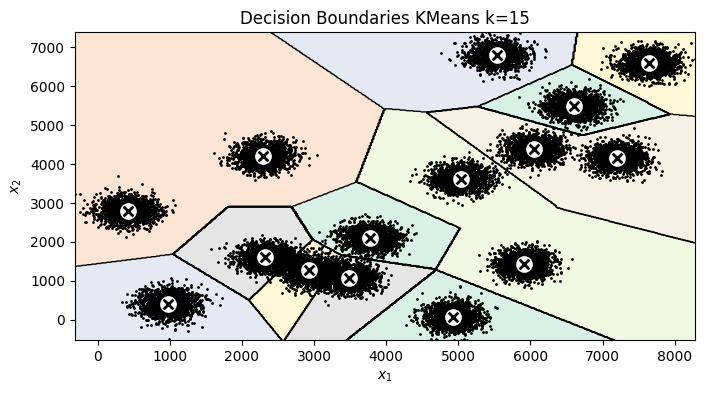

In [ ]:
# Mostrar fronteras de decisión para k fijo
g = plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.title(f"Decision Boundaries KMeans k={k}")
plt.show()

### 2.1 Convergencia parcial de KMeans

Se crean tres modelos con max_iter=1, 2, 3

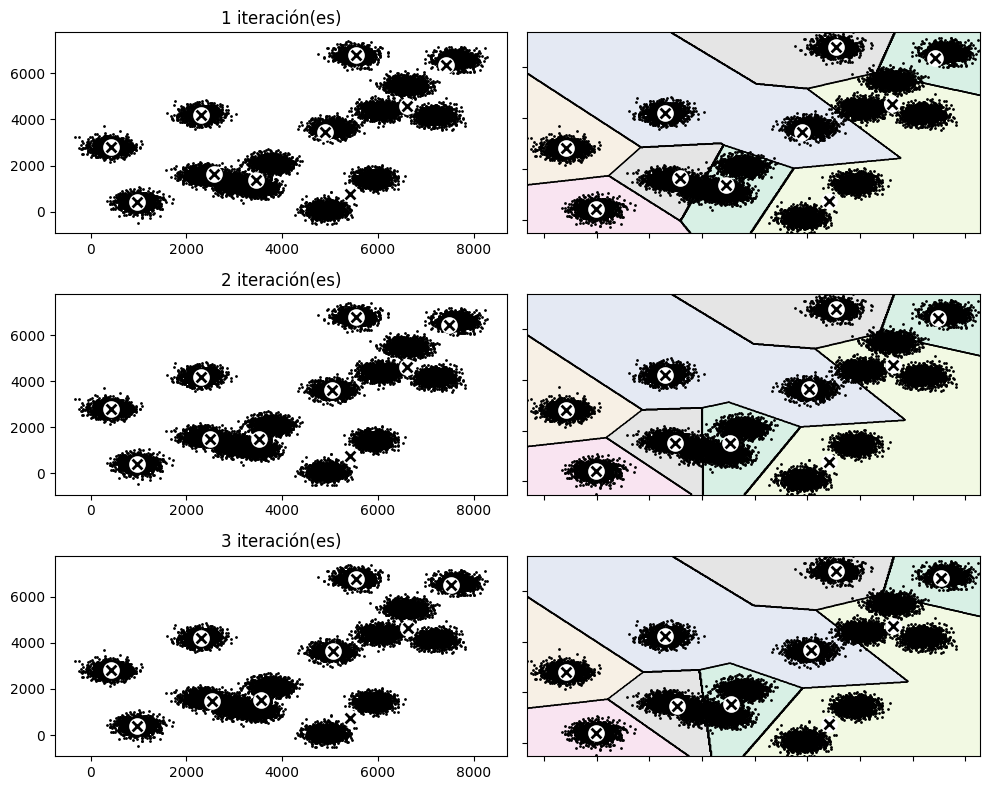

In [ ]:
iters = [1, 2, 3]  # Número de iteraciones a inspeccionar
km_models = []  # Lista para almacenar modelos parciales
n_clusters = 10
for m in iters:
    km = KMeans(n_clusters, init='k-means++', n_init=1,
                algorithm='elkan', max_iter=m, random_state=1)
    km.fit(X)  # Ajustar modelo con m iteraciones
    km_models.append(km)  # Guardar modelo entrenado

# Visualizar evolución de centroides e instancias
plt.figure(figsize=(10, 8))  # Figura de subplots
for idx, km in enumerate(km_models, start=1):
    # Subplot 1: puntos y centroides actuales
    plt.subplot(3, 2, 2*idx-1)
    plot_data(X)
    plot_centroids(km.cluster_centers_)
    plt.title(f"{iters[idx-1]} iteración(es)")
    # Subplot 2: fronteras de decisión posteriores
    plt.subplot(3, 2, 2*idx)
    plot_decision_boundaries(km, X, show_xlabels=False, show_ylabels=False)
plt.tight_layout()  # Ajustar espacio entre subplots
plt.show()

### 2.2 Comparacion de Inicilizaciones Aleatorias

Confrontamos dos ejecuciones con semillas distintas para mostrar la sensibilidad a la semilla inicial.

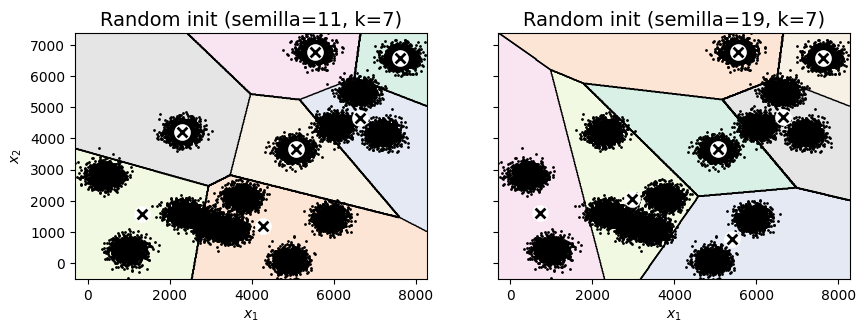

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    # Entrenamos ambos clusterers sobre X
    clusterer1.fit(X)   # Ajustar primer clusterer
    clusterer2.fit(X)   # Ajustar segundo clusterer

    plt.figure(figsize=(10, 3.2))

    # Primer subplot
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    # Segundo subplot (sin etiquetas Y para ahorrar espacio)
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)


# Definimos dos KMeans con inicializaciones aleatorias distintas
k = 7  # número de clusters para comparación


kmeans_rnd_init1 = KMeans(
    n_clusters=k,
    init="random",
    n_init=1,
    algorithm="elkan",
    random_state=11
)
kmeans_rnd_init2 = KMeans(
    n_clusters=k,
    init="random",
    n_init=1,
    algorithm="elkan",
    random_state=19
)

# Llamada a la función de comparativa
plot_clusterer_comparison(
    kmeans_rnd_init1,
    kmeans_rnd_init2,
    X,
    title1=f"Random init (semilla=11, k={k})",
    title2=f"Random init (semilla=19, k={k})"
)

plt.show()

## 3. Metodo del Codo

Calculamos inercia vs k para detectar "codo" para seleccionar un k optimo visualmente.

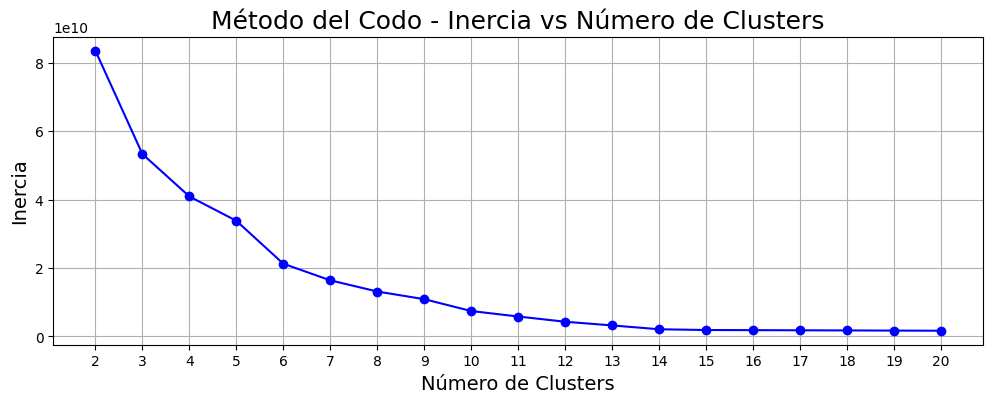

In [ ]:
# Usamos el método del codo para determinar el número de clusters óptimo
inertia = []    # Lista para almacenar inercia de cada k

# Probar para números de clusters entre 2 y 20
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inercia para el método del codo

# Graficar el método del codo
plt.figure(figsize=(12, 4))
plt.plot(range(2, 21), inertia, 'bo-')
plt.title("Método del Codo - Inercia vs Número de Clusters", fontsize=18)
plt.xlabel("Número de Clusters", fontsize=14)
plt.xticks(range(2,21))
plt.ylabel("Inercia", fontsize=14)
plt.grid(True)
plt.show()

## 4. Silhouette Score

Medimos la calidad del clustering usando silhouette score para validar la cohesión y separación de clusters.

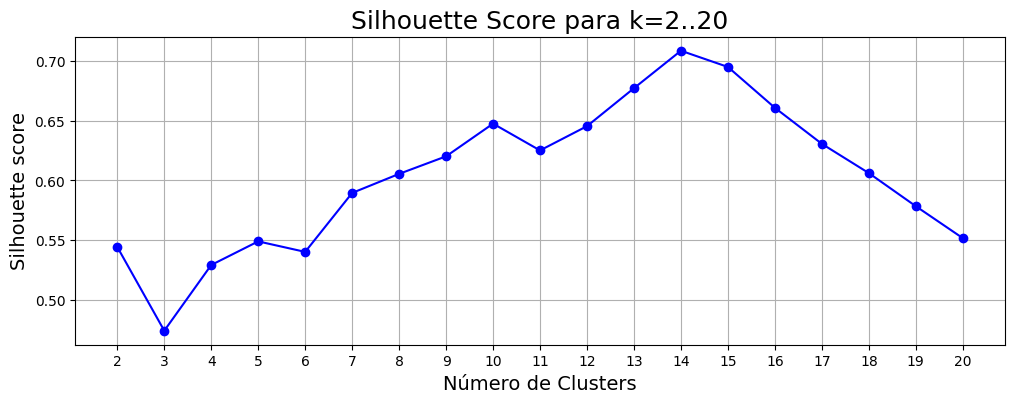

In [ ]:
# Definimos el rango de k en función de tu número máximo de centroides
k_max = 20
k_range = range(1, k_max + 1)   # Rango de k a evaluar

# Ajustamos un KMeans para cada k=1..20
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=42).fit(X)
    for k in k_range
]

# Calculamos silhouette_score solo para k>=2
silhouette_scores = [
    silhouette_score(X, model.labels_)
    for model in kmeans_per_k[1:]   # descartamos k=1
]

# Visualizamos
plt.figure(figsize=(12, 4))
plt.plot(range(2, k_max + 1), silhouette_scores, 'bo-')
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title("Silhouette Score para k=2..20", fontsize=18)
plt.xticks(range(2, k_max + 1))
plt.grid(True)
plt.show()

Mostramos scores cercanos a num_centros para comparar el valor aleatorio con sus vecinos.

In [ ]:
for offset in range(-2, 3):  # -2, -1, 0, 1, 2
    k_eval = num_centros + offset
    if k_eval >= 2:   # silhouette_score no válido para k<2
        kmeans = KMeans(n_clusters=k_eval, random_state=42)
        y_pred = kmeans.fit_predict(X)
        sil_score = silhouette_score(X, y_pred)
        print(f"Silhouette score para k={k_eval}: {sil_score:.3f}")
    else:
        print(f"k={k_eval} no válido para silhouette")


Silhouette score para k=11: 0.699
Silhouette score para k=12: 0.690
Silhouette score para k=13: 0.674
Silhouette score para k=14: 0.634
Silhouette score para k=15: 0.594


### 4.1 Diagramas de Silhouette para cada Cluster

Visualizamos distribución de coeficientes por cluster usando Silhouette Score. El Silhouette Score es una medida de la calidad de la clasificación.

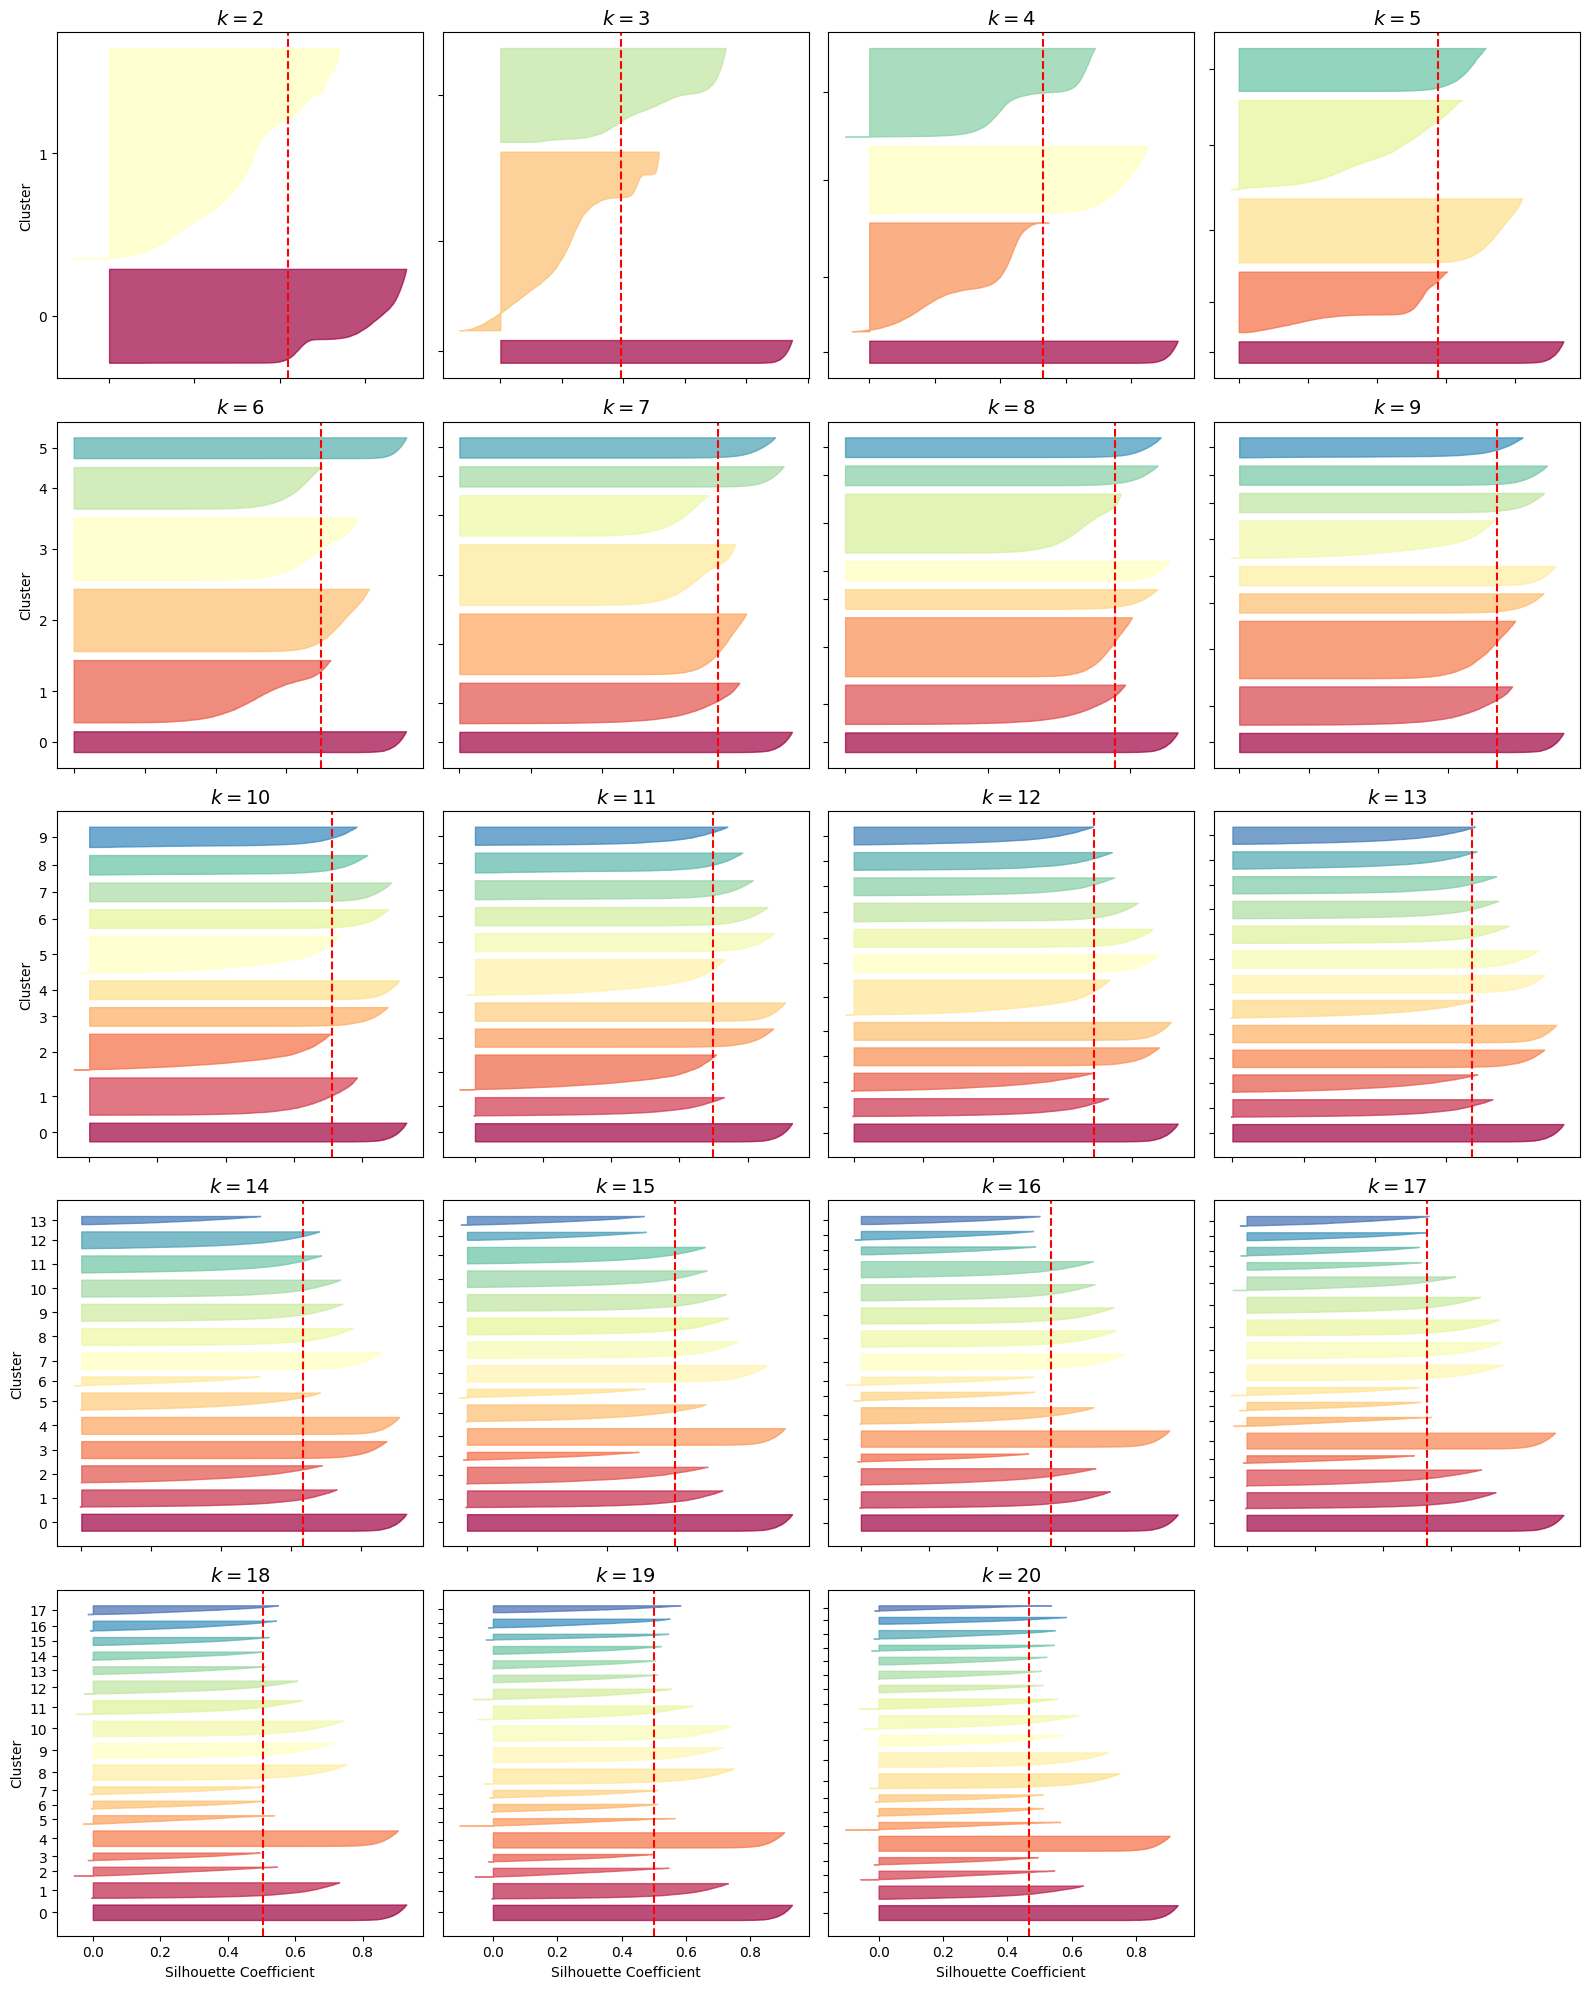

In [ ]:
# Visualizacion de diagramas de siluetas ordenados por grupos y valor
# Parámetros
k_values = list(range(2, 21))
n_cols = 4
n_rows = int(np.ceil(len(k_values) / n_cols))
padding = len(X) // 30  # Espacio entre clusters en el gráfico

# Creamos la figura y los ejes en malla
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows), sharex=False, sharey=False)
axes = axes.flatten()

for idx, k in enumerate(k_values):
    ax = axes[idx]
    model = kmeans_per_k[k-1]         # kmeans_per_k indexado desde 0
    labels = model.labels_             # Etiquetas de clusters
    sil_coeffs = silhouette_samples(X, labels)      # Valores individuales de silueta

    # Construcción del gráfico de siluetas
    pos = padding                   # Posición inicial
    ticks = []
    for cluster_id in range(k):                             # Para cada cluster
        coeffs = np.sort(sil_coeffs[labels == cluster_id])  # Ordenar coeficientes
        color = mpl.cm.Spectral(cluster_id / k)
        ax.fill_betweenx(
            np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7
        )
        ticks.append(pos + len(coeffs)//2)  # Marca central del cluster
        pos += len(coeffs) + padding        # Desplazar para el siguiente

    # Ajustar ejes y línea de referencia
    # Ajustes de ejes
    ax.yaxis.set_major_locator(FixedLocator(ticks))
    ax.yaxis.set_major_formatter(FixedFormatter(range(k)))
    ax.axvline(x=silhouette_scores[k-2], color="red", linestyle="--")
    ax.set_title(f"$k={k}$", fontsize=14)

    # Etiquetas sólo en los bordes externos
    if idx % n_cols == 0:
        ax.set_ylabel("Cluster")
    else:
        ax.tick_params(labelleft=False)
    if idx // n_cols == n_rows - 1:
        ax.set_xlabel("Silhouette Coefficient")
    else:
        ax.tick_params(labelbottom=False)

# Ocultamos cualquier subgráfico sobrante
for j in range(len(k_values), n_rows*n_cols):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

# **PUNTO 2**

# K-Means para aprendizaje semi-supervisado:

El aprendizaje semi-supervisado (o Semi-supervised Learning) comprende el conjunto de técnicas que nos permiten entrenar modelos con datasets parcialmente etiquetados. En esta sección vamos a ver un ejemplo de como podemos aplicar esta técnica con el dataset MNIST y usando K-Means. Empezamos descargando el dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Cargar dataset
column_names = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
] + [f'Wilderness_Area{i}' for i in range(4)] + [f'Soil_Type{i}' for i in range(40)] + ['Cover_Type']

df = pd.read_csv('/content/drive/MyDrive/covtype.data', header=None, names=column_names)



In [ ]:
# 2. Dividir dataset en entrenamiento y prueba (80% y 20%)
train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
# 3. Separar variables X e y
X_train = train_dataset.drop(['Cover_Type'], axis=1).values
y_train = train_dataset['Cover_Type'].values
X_test = test_dataset.drop(['Cover_Type'], axis=1).values
y_test = test_dataset['Cover_Type'].values

In [ ]:
# 5. Subconjunto de entrenamiento para análisis de silueta
X_train_subset = X_train[:2000]


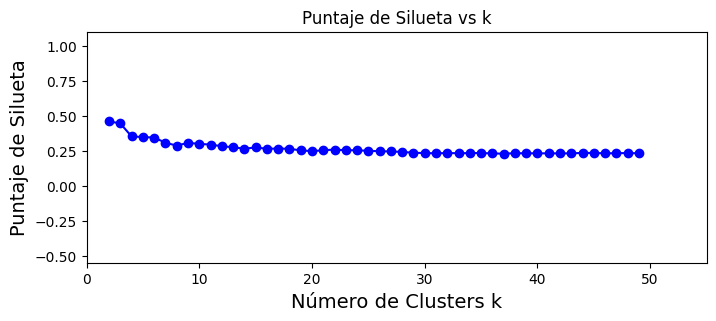

In [ ]:
# 6. Aplicar KMeans para varios valores de k y calcular la puntuación de silueta
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_subset) for k in range(1, 50)]
silhouette_scores = [silhouette_score(X_train_subset, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 50), silhouette_scores, "bo-")
plt.xlabel("Número de Clusters k", fontsize=14)
plt.ylabel("Puntaje de Silueta", fontsize=14)
plt.axis([0, 55, -0.55, 1.1])
plt.title("Puntaje de Silueta vs k")
plt.show()


In [ ]:
# 7. Elegimos k = 2 para este ejemplo (puedes cambiarlo según el gráfico anterior)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)


In [ ]:
# 8. Elegimos el punto más cercano al centroide de cada cluster
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[idxs]
y_representative_digits = y_train[idxs]

print("Los valores representativos (uno por cluster):")
print(X_representative_digits)
print("Etiquetas correspondientes:", y_representative_digits)

Los valores representativos (uno por cluster):
[[2896  108   10  216   50 1507  238  228  120 1531    1    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     1    0    0    0    0    0    0    0    0    0    0    0]
 [3178  144    8  268    3 4287  232  239  139 2943    1    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
Etiquetas correspondientes: [2 1]


In [ ]:
# 9. Entrenamos un clasificador solo con esos puntos representativos
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

from time import time
start = time()
log_reg2.fit(X_representative_digits, y_representative_digits)
print("Tiempo de entrenamiento:", round(time() - start, 2), "segundos")

Tiempo de entrenamiento: 0.01 segundos


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# 10. Evaluación
scaler = StandardScaler()
scaler.fit(X_train)  # ajusta el escalador solo con los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)
X_representative_digits_scaled = scaler.transform(X_representative_digits)
log_reg2.fit(X_representative_digits_scaled, y_representative_digits)
score = log_reg2.score(X_test_scaled, y_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


# APRENDIZAJE ACTIVO


El aprendizaje activo (o Active Learning) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en loa que el modelo tenga más problemas.


In [ ]:
# Aprendizaje Activo

# Usamos el mismo modelo log_reg2 (entrenado previamente)
# Si quieres entrenar uno nuevo, cambia log_reg2 por log_reg3/log_reg5, etc.

# Escalamos X_train[:1000] si usamos scaler
X_train_1000_scaled = scaler.transform(X_train[:1000])  # reutilizamos el mismo scaler

# 1. Obtenemos las probabilidades
probas = log_reg2.predict_proba(X_train_1000_scaled)

# 2. Determinamos las etiquetas más probables
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])

# 3. Ordenamos por menor confianza (menor probabilidad máxima)
sorted_ixs = np.argsort(labels)

# 4. Elegimos las instancias más inciertas (por ejemplo, k=2)
k = 2
X_lowest = X_train[:1000][sorted_ixs[:k]]
y_lowest = y_train[:1000][sorted_ixs[:k]]

print("Instancias con menor confianza del modelo:")
print(X_lowest)

Instancias con menor confianza del modelo:
[[3110   37   10  513   15 5367  220  219  133 1498    1    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [2939  334   10  150   30 4297  197  227  169 2382    1    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    1    0    0    0    0    0    0    0    0    0    0]]


In [ ]:
# 5. Simulamos el etiquetado manual (propagación)
y_train_propagated = np.full(1000, -1)
y_train2 = y_train_propagated.copy()
y_train2[sorted_ixs[:k]] = y_lowest

# 6. Entrenamos un nuevo modelo con las pocas etiquetas propagadas
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

%time log_reg5.fit(X_train_1000_scaled, y_train2)


CPU times: user 29.4 ms, sys: 0 ns, total: 29.4 ms
Wall time: 16.8 ms


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [ ]:
# 7. Evaluamos
X_test_scaled = scaler.transform(X_test)
accuracy = log_reg5.score(X_test_scaled, y_test)
print("Accuracy en test con aprendizaje activo:", accuracy)


Accuracy en test con aprendizaje activo: 2.58168894090514e-05
